In [ ]:
# This file shows our exploration and preliminary processing of the data. 
# The final models and results are provided in the KNN.py and RandomForest.py files.


In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score


In [ ]:
# Import dataset
filename = 'data.csv'
df = pd.read_csv(filename)

print(df.shape) # View the dataset's column names


In [ ]:
# View data types
pd.set_option('display.max_rows', 500)
print(df.dtypes)


In [ ]:
# View the first 10 records
df.head(10)


In [ ]:
# View the number of missing values in the dataset
print(df.isna().any(axis=1).sum())


In [ ]:
# Descriptive statistics
df.describe()


In [ ]:
# The distribution of the 'target' class in the dataset
print(df.groupby('target').size())


In [ ]:
# Generate a bar plot for 'target'
sns.countplot(x=df['target'])


In [ ]:
# View the general distribution of each feature
df.hist(bins = 20, figsize = (40, 30))
plt.show()


In [5]:
# 导入数据
filename = 'data.csv'
df = pd.read_csv(filename)
# 数据维度
print(df.shape) # 查看---数据量与字段的组织与存储
df.columns # 查看各个字段的数据表字段

(300000, 23)


Index(['id', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'target'],
      dtype='object')

### 2.2分析整理各项数据<font color='red'>（不确定0或1代表，可能意思要对调）</font>
<table border="1" cellspacing="0" >
  <tr>
    <td width="211" valign="top" ><p >*HighBP高血压 </p></td>
    <td width="229" valign="top" ><p >0 = 正常，1 = 高 </p></td>
    <td width="230" valign="top" ><p >*HvyAlcoholConsump酗酒者 </p></td>
    <td width="738" valign="top" ><p >0 = 否， 1 = 是 </p></td>
  </tr>
  <tr>
    <td width="211" valign="top" ><p >*HighChol高酒精 </p></td>
    <td width="229" valign="top" ><p >0 = 正常， 1 = 酒精肝 </p></td>
    <td width="230" valign="top" ><p >*AnyHealthcare任何医疗保健 </p></td>
    <td width="738" valign="top" ><p >0 = 无， 1 = 有 </p></td>
  </tr>
  <tr>
    <td width="211" valign="top" ><p >*CholCheck胆固醇检查 </p></td>
    <td width="229" valign="top" ><p >0 =接受检查， 1 = 未检查 </p></td>
    <td width="230" valign="top" ><p >*NoDocbcCost是否看医生 </p></td>
    <td width="738" valign="top" ><p >0 = 无， 1 = 有 </p></td>
  </tr>
  <tr>
    <td width="211" valign="top" ><p >*BMI体重指数 </p></td>
    <td width="229" valign="top" ><p >身体质量指数 </p></td>
    <td width="230" valign="top" ><p >*GenHlth健康状况 </p></td>
    <td width="738" valign="top" ><p >1-5，健康评分 </p></td>
  </tr>
  <tr>
    <td width="211" valign="top" ><p >*Smoker吸烟者 </p></td>
    <td width="229" valign="top" ><p >0 = 无， 1 = 有 </p></td>
    <td width="230" valign="top" ><p >*MentHlth心理健康 </p></td>
    <td width="738" valign="top" ><p >1-30， 一个月中健康的天数 </p></td>
  </tr>
  <tr>
    <td width="211" valign="top" ><p >*Stroke中风 </p></td>
    <td width="229" valign="top" ><p >0 = 无， 1 = 有 </p></td>
    <td width="230" valign="top" ><p >*PhysHlth身体健康 </p></td>
    <td width="738" valign="top" ><p >1-30， 一个月中健康的天数 </p></td>
  </tr>
  <tr>
    <td width="211" valign="top" ><p >*HeartDiseaseorAttack心脏疾病 </p></td>
    <td width="229" valign="top" ><p >0 = 无，1 = 有 </p></td>
    <td width="230" valign="top" ><p >*DiffWalk走路/爬楼困难 </p></td>
    <td width="738" valign="top" ><p >0 = 否， 1 = 是 </p></td>
  </tr>
  <tr>
    <td width="211" valign="top" ><p >*PhysActivity身体运动 </p></td>
    <td width="229" valign="top" ><p >0 = 无，1 = 有 </p></td>
    <td width="230" valign="top" ><p >*Sex性别 </p></td>
    <td width="738" valign="top" ><p >1=男， 0=女（凭现有信息无法确定） </p></td>
  </tr>
  <tr>
    <td width="211" valign="top" ><p >*Fruits水果 </p></td>
    <td width="229" valign="top" ><p >0 = 不吃， 1 = 常吃 </p></td>
    <td width="230" valign="top" ><p >*Education教育 </p></td>
    <td width="738" valign="top" ><p >1-6， 受教育程度评分 </p></td>
  </tr>
  <tr>
    <td width="211" valign="top" ><p >*Veggies蔬菜 </p></td>
    <td width="229" valign="top" ><p >0 = 不吃， 1 = 常吃 </p></td>
    <td width="230" valign="top" ><p >*Income收入 </p></td>
    <td width="738" valign="top" ><p >1-8， 收入等级评分 </p></td>
  </tr>
  <tr>
    <td width="211" valign="top" ><p >*Age年龄 </p></td>
    <td width="229" valign="top" ><p >1-13个级别组 </p></td>
    <td valign="top" colspan="2" ><p ><font color='red'>自我分析：发现数据中Age项值为1的数据共有5964条，其中148条的HighChol与Smoker项均为1，占比为2.4%。<br>这个比例不算小，由于年纪小的人不大可能既抽烟又酗酒，合理推测样本中被采样者年龄下限不会太小。<br>另一方面，既抽烟又酗酒者占每个年龄段人数的比例随Age值先增加后降低，与常识相符。故作如下推测：数据集中最低实际年龄为18岁，按照4年一段进行分割。</font> </p></td>
  </tr>

  </tr>
  <tr></font>
    <td width="229" valign="top" >
    <p >*target预测糖尿病 </p></td>
    <td valign="top" colspan="3" ><p >0=非糖尿病，1=糖尿病前期，2=糖尿病 </p></td>
  </tr>
</table>

#### 患者基本信息统计共有300000条记录,分析数据如下：
<font color='red'>年龄</font>：自定义收集数据年龄从18岁到70+岁不等。<br>1=18-21 / 2=22-25 / 3=26-29 / 4=30-33 / 5=34-37 / 6=38-41 / 7=42-45
8=46-49 / 9=50-53 / 10=54-57 / 11=58-61 / 12=62-65 / 13=66+以上<br>
<font color='red'>性别</font>：共有2个不同的性别分类，其中男性（0）和女性（1）均有记录，男性占52.51%，女性占47.49%。<br>
<font color='red'>BMI</font>：体质指数范围从15.03到39.99，平均值约为27.69。

### 2.3数据探索
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;类别分布的不平衡，会影响建模效果，所以要为模型剔除掉干扰项,观察缺失值数。

In [9]:
# 查看数据类型
pd.set_option('display.max_rows', 500)
print(df.dtypes)

id                        int64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
target                  float64
dtype: object


In [10]:
# 查看最初的10条记录
df.head(10)

,id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
0,0,0.0,0.000000,1.000000,18.119460,1.000000,0.000000,0.0,1.000000,1.000000,...,0.000000,2.000000,1.880540,0.000000,0.0,0.000000,6.000000,6.000000,8.000000,0.0
1,1,0.0,1.000000,1.000000,28.000000,1.000000,0.000000,0.0,1.000000,1.000000,...,0.000000,2.000000,2.000000,0.000000,0.0,0.000000,7.000000,6.000000,8.000000,0.0
2,2,0.0,0.000000,1.000000,32.000000,0.000000,0.000000,0.0,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.487226,0.0,0.000000,9.000000,4.000000,6.512774,0.0
3,3,1.0,1.000000,1.000000,39.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.000000,4.000000,3.000000,0.000000,1.0,1.000000,10.000000,6.000000,5.000000,2.0
4,4,1.0,0.000000,1.000000,33.000000,0.000000,0.000000,0.0,1.000000,1.000000,...,0.000000,5.000000,20.000000,15.000000,0.0,0.000000,6.000000,4.000000,5.000000,0.0
5,5,1.0,0.222893,1.000000,45.777107,0.000000,0.000000,0.0,0.000000,0.222893,...,1.000000,2.777107,0.000000,3.777107,0.0,0.222893,2.000000,5.554213,7.222893,0.0
6,6,0.0,0.000000,1.000000,24.000000,0.000000,0.000000,0.0,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.0,1.000000,8.000000,6.000000,8.000000,0.0
7,7,1.0,0.388786,1.000000,20.611214,0.388786,0.388786,0.0,0.000000,1.000000,...,0.000000,4.000000,0.777571,30.000000,1.0,0.000000,12.000000,4.000000,2.388786,2.0
8,8,1.0,0.373253,0.626747,27.000000,1.000000,0.000000,0.0,0.626747,1.000000,...,0.626747,4.626747,20.000000,20.000000,0.0,0.373253,7.626747,4.000000,4.000000,0.0
9,9,0.0,0.000000,1.000000,39.000000,0.000000,0.000000,0.0,0.986887,0.986887,...,0.000000,3.013113,0.000000,1.973773,0.0,0.000000,13.000000,4.986887,2.000000,0.0


In [11]:
# 查看表格中缺失值的数量
print(df.isna().any(axis=1).sum())

0


可以看出表中并没有任何缺失值。

In [13]:
# 描述性统计信息
df.describe()

,id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,149999.500000,0.430242,0.424958,0.966981,28.413251,0.448207,0.037682,0.090392,0.762769,0.642363,...,0.077537,2.504301,3.180385,4.229010,0.164786,0.437267,8.080662,5.064394,6.085121,0.300000
std,86602.684716,0.486627,0.485170,0.173147,6.706940,0.487675,0.183704,0.278855,0.414860,0.469067,...,0.258544,1.050306,7.407253,8.714524,0.363119,0.487002,3.033612,0.963329,2.045542,0.700001
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,74999.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.737870,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,149999.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,224999.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,299999.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,2.000000


数据集包含了患者的各项健康指标及其是否患有糖尿病的标签。数据集的主要目标是通过机器学习模型预测糖尿病的发病风险，并分析影响糖尿病的主要健康因素。

### 2.4数据初步探索及可视化

In [16]:
# 2.4.1数据目标'target'的分类分布数量
print(df.groupby('target').size())

target
0.0    252000
1.0      6000
2.0     42000
dtype: int64


<Axes: xlabel='target', ylabel='count'>

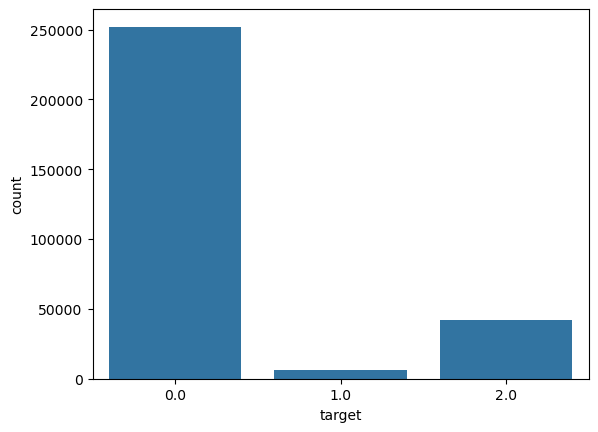

In [17]:
# 'target'(0为非糖尿病，1为糖尿病前期，2为糖尿病)在x轴，人数在y轴的条形图
sns.countplot(x=df['target'])

从上面结果观察到，target=0的非糖尿病人群共252000人，target=1的糖尿病前期人群共6000人，target=2的预测糖尿病人群42000人。<br>

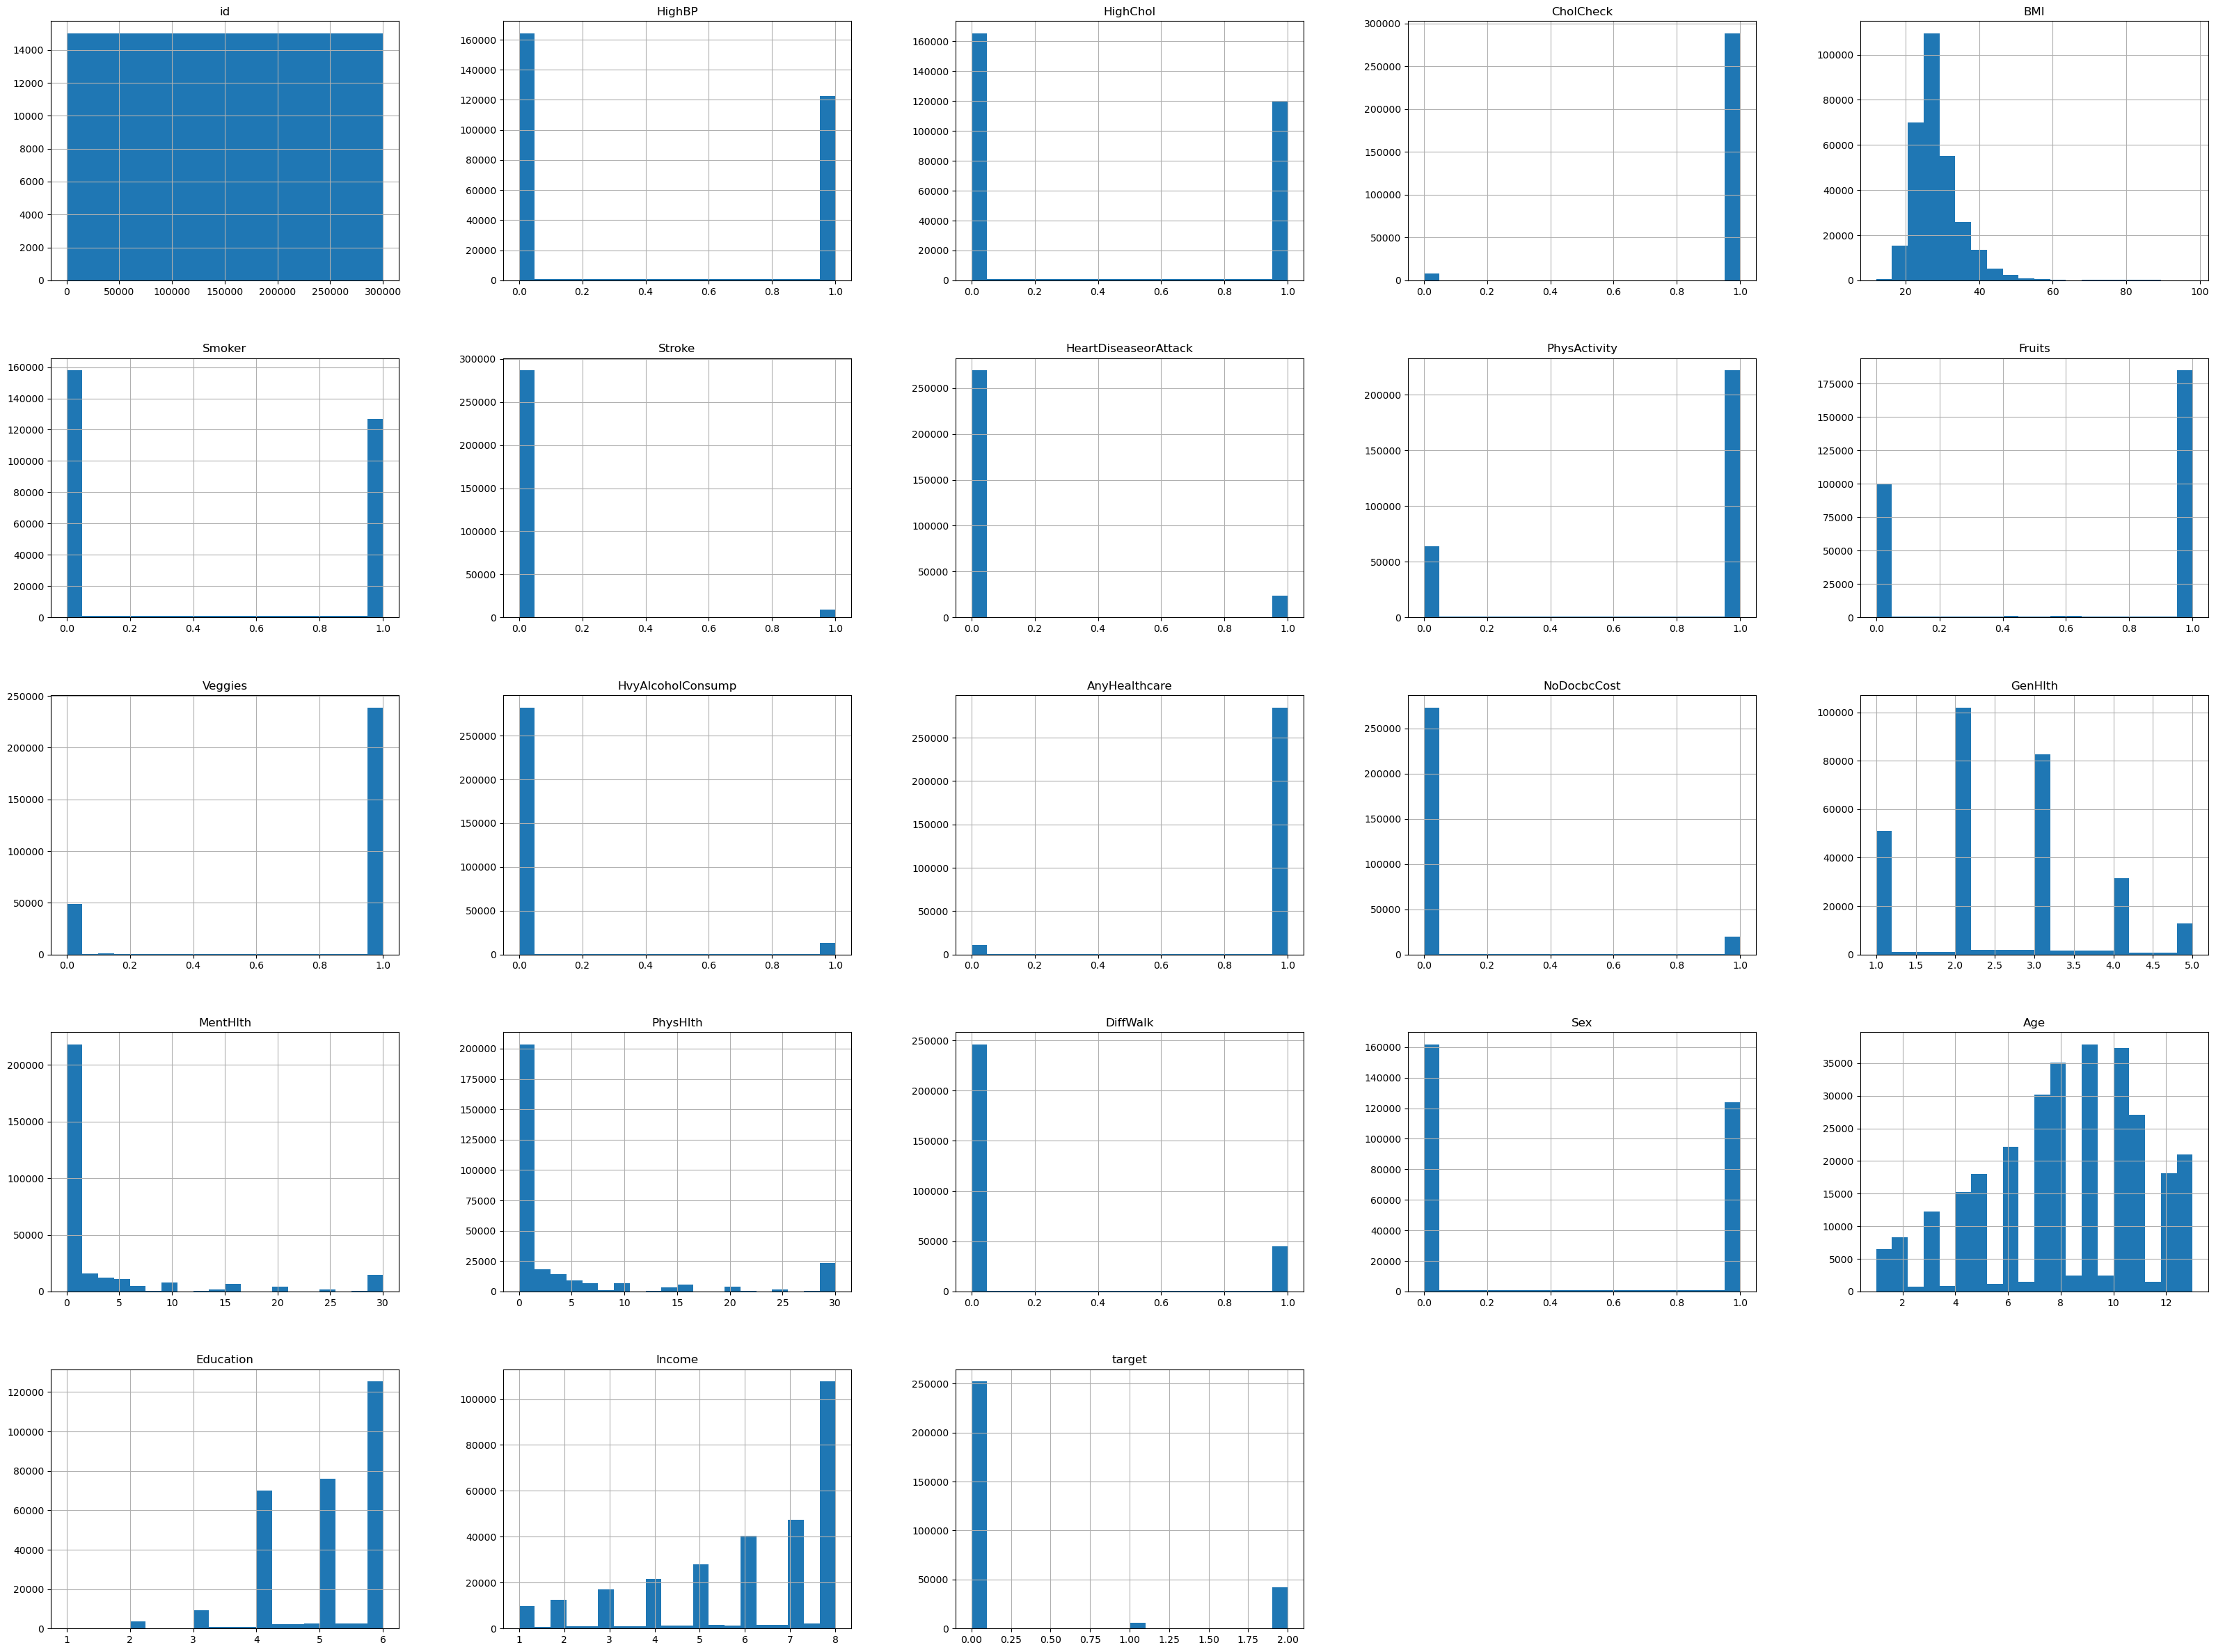

In [19]:
# 查看每个特征的大致分布
df.hist(bins = 20, figsize = (40, 30))
plt.show()

可以看出：
- 对于取值为0到1之间的数据，从语义上看其取值应当只能取0或1，但实际上数据集中存在少量取值为0到1之间小数的数据。由于没有更多信息表明这些异常值是怎么出现的，考虑简单地对其四舍五入处理。
- 对于一些连续型的数据，其大部分取值为整数，而少数数据取值为小数。有理由认为这些数据也不是正常值，因此同样考虑四舍五入到最近的整数。这样做有助于提升模型拟合的准确性，因为连续数据与离散数据相比往往需要额外的处理。
- 年龄Age一项反映的应当不是被采样者的真实年龄（从Excel表中可以发现数据集中抽烟者多达134432人，其中Age为1的有1217人。很难想象怎么会有这么多抽烟的一岁婴儿，所以合理怀疑数据经过混淆）；但鉴于年龄满足偏序关系，并且年龄分布总的来说比较正常，故不做额外处理。
- 从数据分布来看，BMI取值为20&#126;40之间的最多，在这个范围外的值很少。而BMI的正常值在18.5&#126;24.5之间，超过30则属肥胖；这个数值范围和20~40比较接近，因此可以认为数据集中的BMI值与被采样者实际的BMI偏差不会太高。那么BMI中值为50以上的少数数据就显得非常荒谬，可以看到最大值甚至达到了98（对这个数值没有直观概念的话可以参考一下：一个身高180cm的成年人要达到这个BMI，体重需要达到317kg）。因此把数据集中BMI值超过50的那些数据全部改成50。

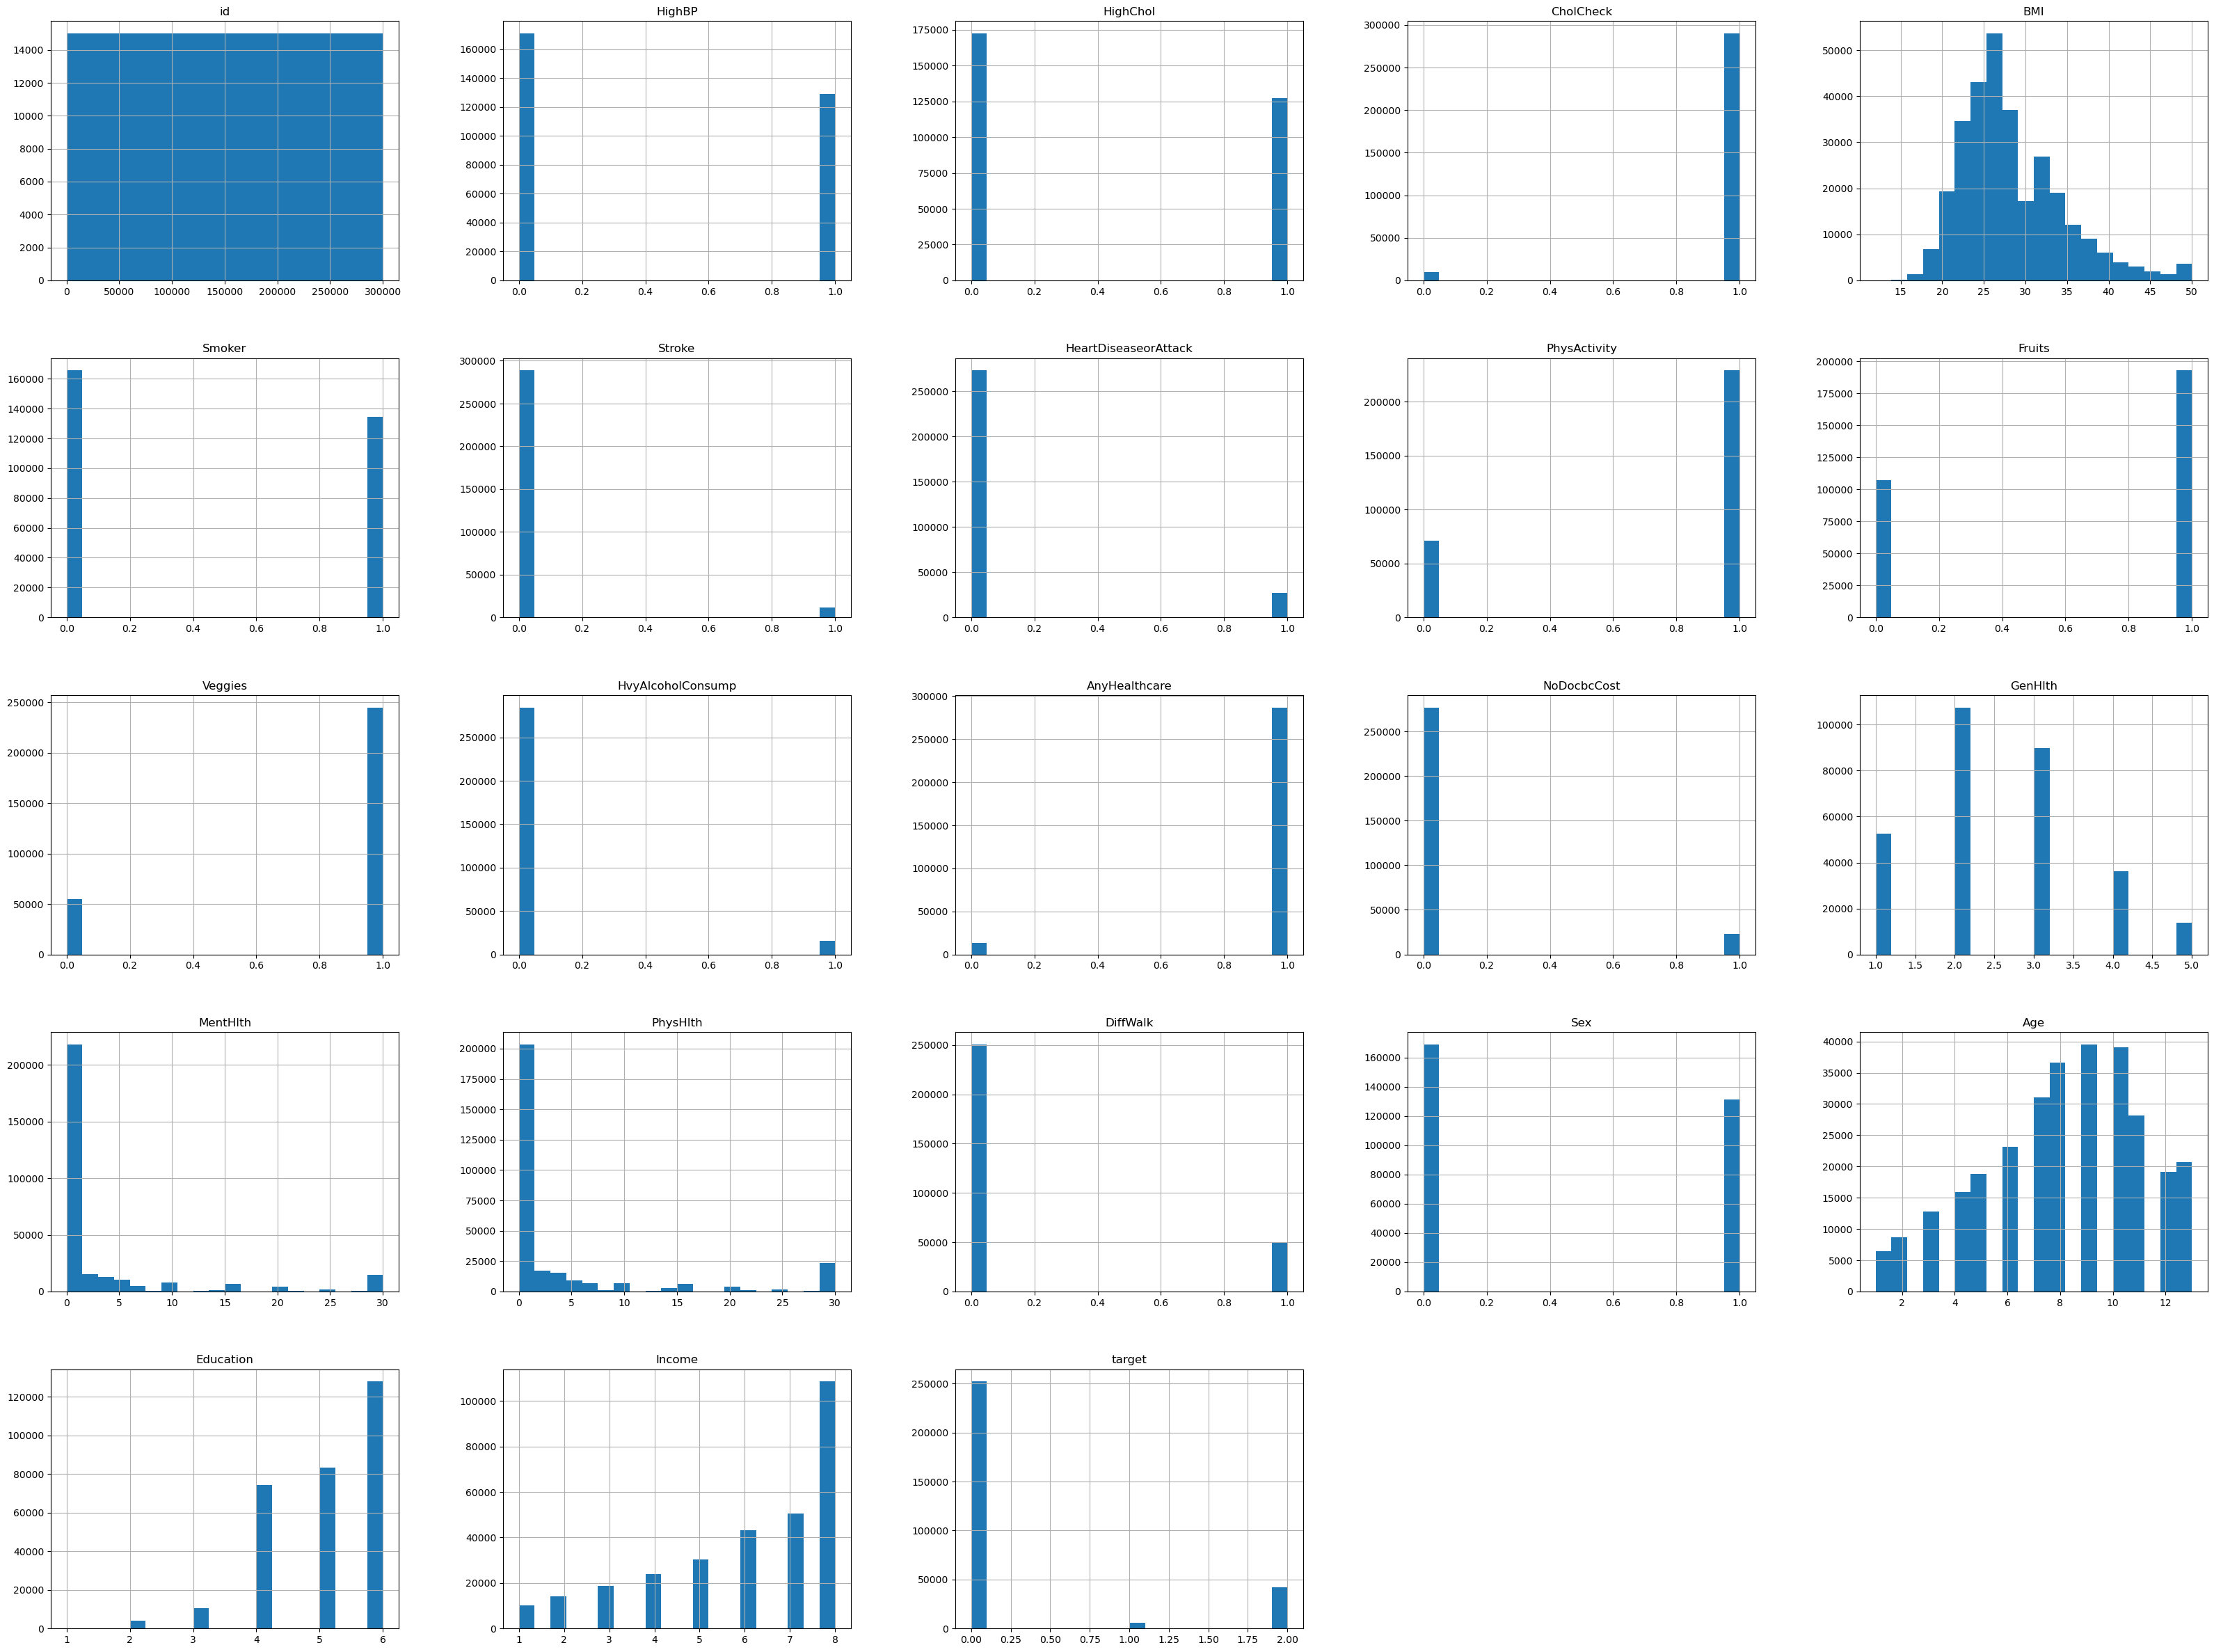

In [22]:
### Data Cleaning
# Round all data to the nearest integer
df = df.applymap(lambda x: round(x, 0))

# Modify the abnormal BMI values
df.loc[df['BMI'] > 50, 'BMI'] = 50
mask = df['BMI'] > 50
df.loc[mask, 'BMI'] = 50

# View the distribution of the new features
df.hist(bins = 20, figsize = (40, 30))
plt.show()


In [23]:
# Separate features and labels
labels = df.iloc[:, -1]
features = df.iloc[:, 1:-1]

# Compute the correlation between each feature and the label
result = {}
for column in features.columns:
    corr, _ = spearmanr(features[column], labels)
    result[column] = corr

for feature, corr in result.items():
    print(f"Correlation of {feature}: {corr}")


Correlation of HighBP: 0.2777460446979763
Correlation of HighChol: 0.21833583037670826
Correlation of CholCheck: 0.06369999750942562
Correlation of BMI: 0.2360421820710586
Correlation of Smoker: 0.06463446236836622
Correlation of Stroke: 0.10602719277707971
Correlation of HeartDiseaseorAttack: 0.1790934202334214
Correlation of PhysActivity: -0.12326026082585968
Correlation of Fruits: -0.043109347042653144
Correlation of Veggies: -0.06166590419300246
Correlation of HvyAlcoholConsump: -0.055981082153294226
Correlation of AnyHealthcare: 0.013370890964745837
Correlation of NoDocbcCost: 0.03829429839026834
Correlation of GenHlth: 0.30046976162147176
Correlation of MentHlth: 0.046823889226951076
Correlation of PhysHlth: 0.16318637404515152
Correlation of DiffWalk: 0.22387481712502913
Correlation of Sex: 0.03125212366585423
Correlation of Age: 0.18552208645957996
Correlation of Education: -0.12903114166066967
Correlation of Income: -0.17411932751347084


In [25]:
### 3.3 Train and Test the Model
def test_model(model):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=233)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Model: {model.__class__.__name__}, Accuracy: {f1}")

# Models for training
models = [
    RandomForestClassifier(random_state=42),
    LogisticRegression(random_state=42, max_iter=1000),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),
    Perceptron(random_state=42, max_iter=1000)
]

# Iterate through the model list, passing each model for training and evaluation
for model in models:
    test_model(model)


Model: RandomForestClassifier, Accuracy: 0.7260446329207287
Model: LogisticRegression, Accuracy: 0.3999638998228492
Model: DecisionTreeClassifier, Accuracy: 0.6425349708910102
Model: KNeighborsClassifier, Accuracy: 0.4937805664504773
Model: GaussianNB, Accuracy: 0.43204107612330783
Model: MultinomialNB, Accuracy: 0.3926650687678877
Model: BernoulliNB, Accuracy: 0.42025900929367915
Model: ComplementNB, Accuracy: 0.38432702401838803
Model: Perceptron, Accuracy: 0.41141501201406383
